In [101]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [102]:
!pip install bioinfokit

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
pd.options.mode.chained_assignment = None  # 'warn' or 'raise'
from bioinfokit.visuz import cluster
from sklearn.decomposition import PCA


In [104]:
#DATASET IMPORT---STEP 3
data = pd.read_csv("gdrive/My Drive/mcdonalds_dataset.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [105]:
# CHECKING DATA FOR PREPROCESSING
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


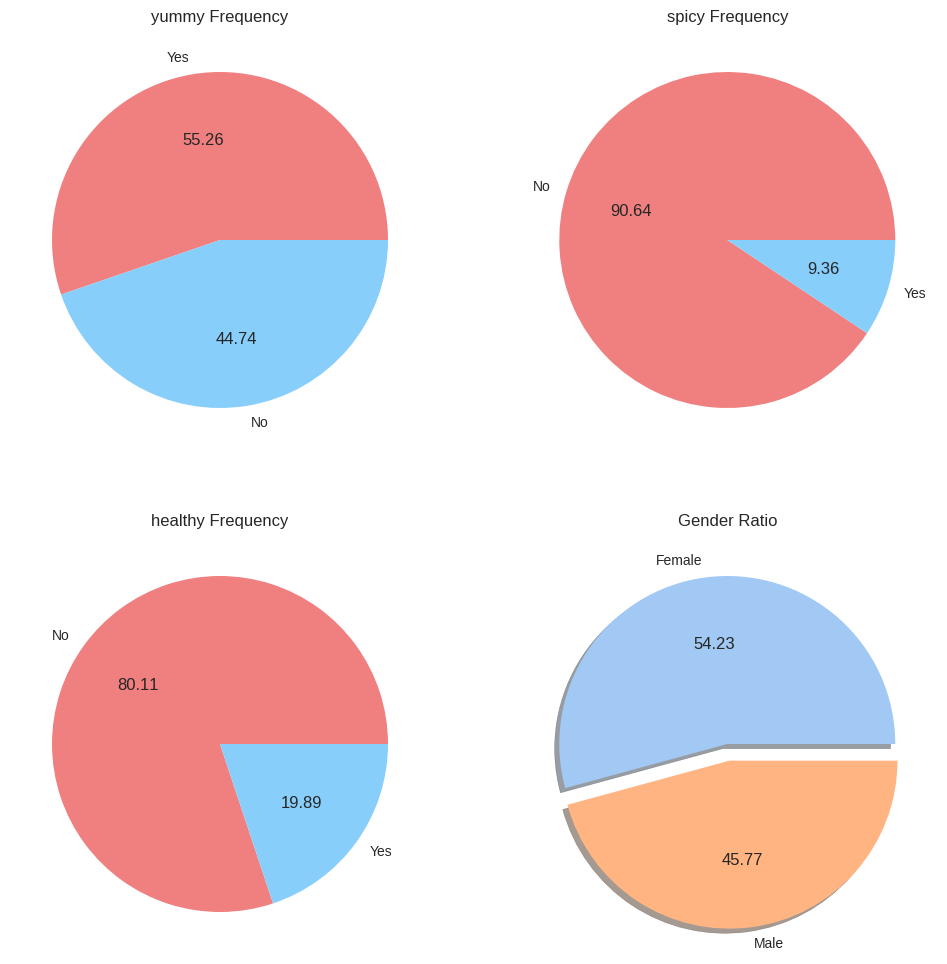

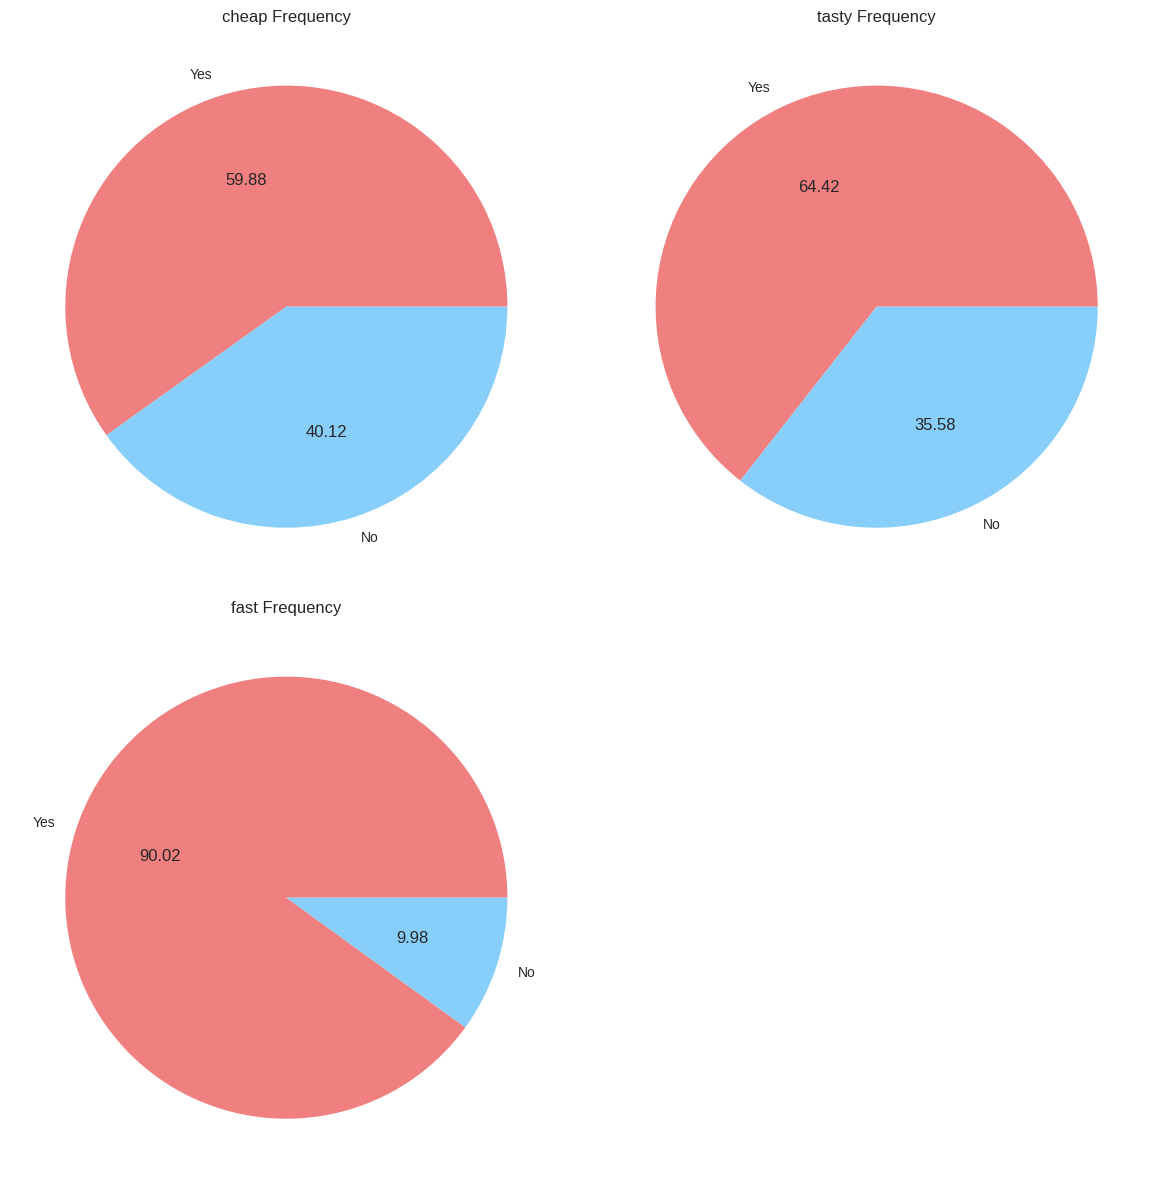

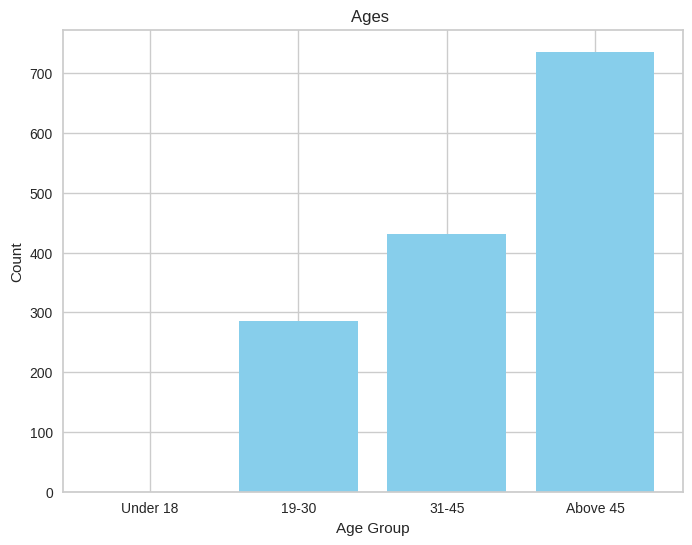

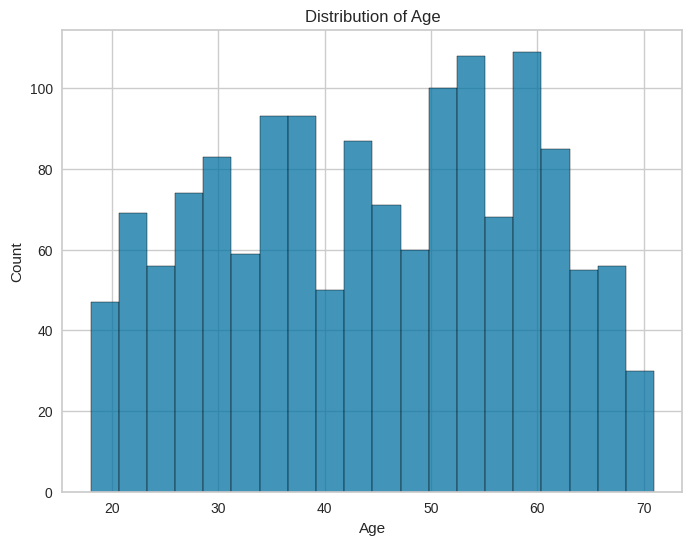

In [106]:
colors1=['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
colors2=sns.color_palette("pastel")
#DISTINGUISHING DATA BASED ON CERTAIN FACTORS AND GETTING A DISTRIBUTION OF AGE

def eda(data):
    # Get the list of column names
    data_heads = list(data.columns)

    def plot_binary_attribute_percentage(attribute_name):
        freq = data[attribute_name].value_counts(normalize=True) * 100
        plt.pie(freq, labels=freq.index, autopct='%0.2f',colors=colors1)
        plt.title(f'{attribute_name} Frequency')

    # Plot binary attribute percentages for 'yummy', 'spicy', 'healthy'
    plt.figure(figsize=(12, 12))
    for i, attribute in enumerate(['yummy', 'spicy', 'healthy']):
        plt.subplot(2, 2, i + 1)
        plot_binary_attribute_percentage(attribute)

    # Plot gender ratio
    gender_freq = data['Gender'].value_counts(normalize=True) * 100
    plt.subplot(2, 2, 4)
    plt.pie(gender_freq, labels=gender_freq.index, autopct='%0.2f',explode=[0,0.1],shadow=True, colors=colors2)
    plt.title('Gender Ratio')

    plt.figure(figsize=(12, 12))
    for i, attribute in enumerate(['cheap', 'tasty', 'fast']):
        plt.subplot(2, 2, i + 1)
        plot_binary_attribute_percentage(attribute)

    plt.tight_layout()
    plt.show()

    # Categorize ages and create a bar plot
    age_categories = ["Under 18", "19-30", "31-45", "Above 45"]
    category_counts = [0, 0, 0, 0]

    for age in data['Age']:
        if age < 18:
            category_counts[0] += 1
        elif 19 <= age <= 30:
            category_counts[1] += 1
        elif 31 <= age <= 45:
            category_counts[2] += 1
        else:
            category_counts[3] += 1

    plt.figure(figsize=(8, 6))
    plt.bar(age_categories, category_counts, color='skyblue')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.title('Ages ')
    plt.show()

    # Plot age distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x='Age', bins=20)
    plt.title('Distribution of Age')
    plt.show()

eda(data)


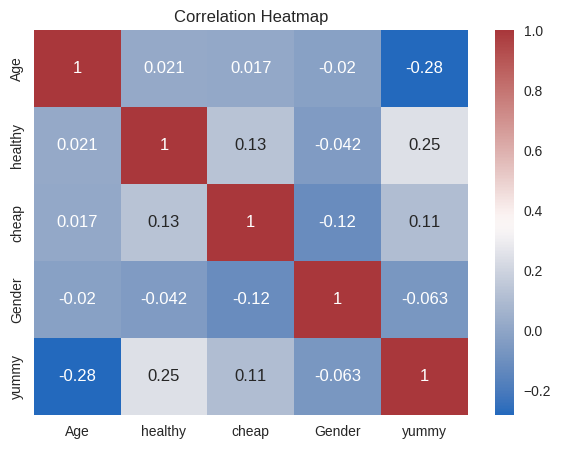

In [107]:

selected_columns = ['Age', 'healthy', 'cheap', 'Gender', 'yummy']
data_subset = data[selected_columns]

#ENCODING FOR ANALYSIS
data_subset['healthy'] = data_subset['healthy'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
data_subset['cheap'] = data_subset['cheap'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
data_subset['Gender'] = data_subset['Gender'].apply(lambda x: 1 if x.lower() == 'male' else 0)
data_subset['yummy'] = data_subset['yummy'].apply(lambda x: 1 if x.lower() == 'yes' else 0)


correlation_matrix = data_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='vlag')
plt.title('Correlation Heatmap')
plt.show()


+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64


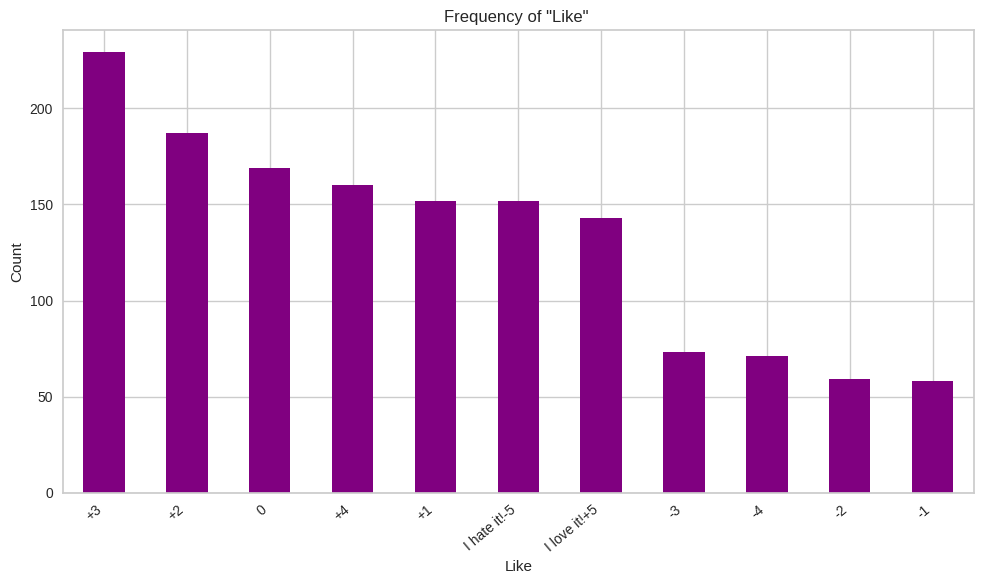

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64


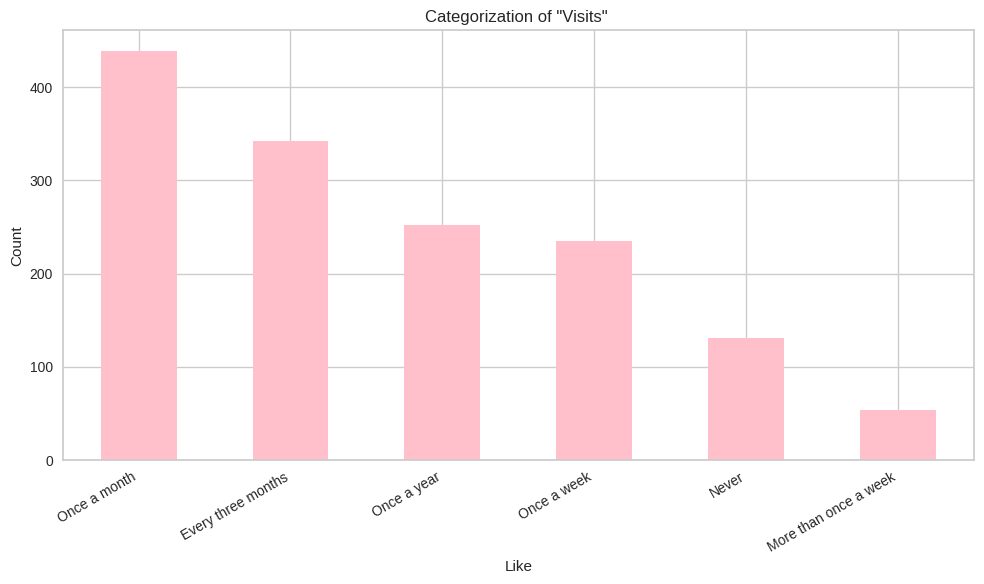

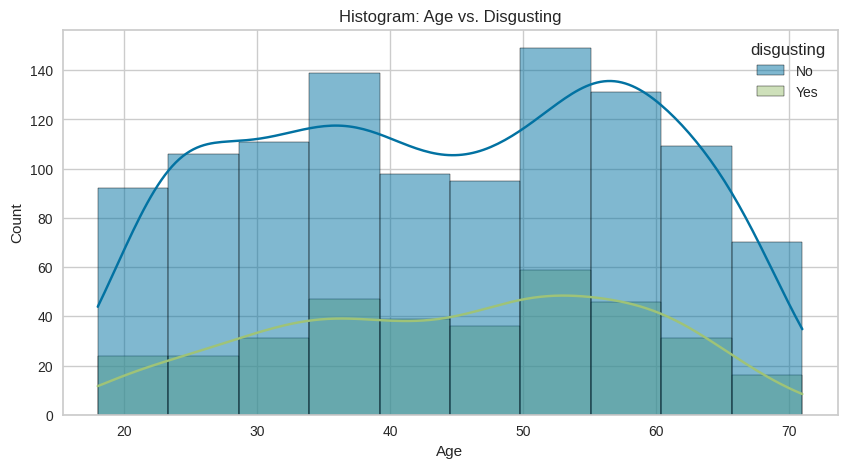

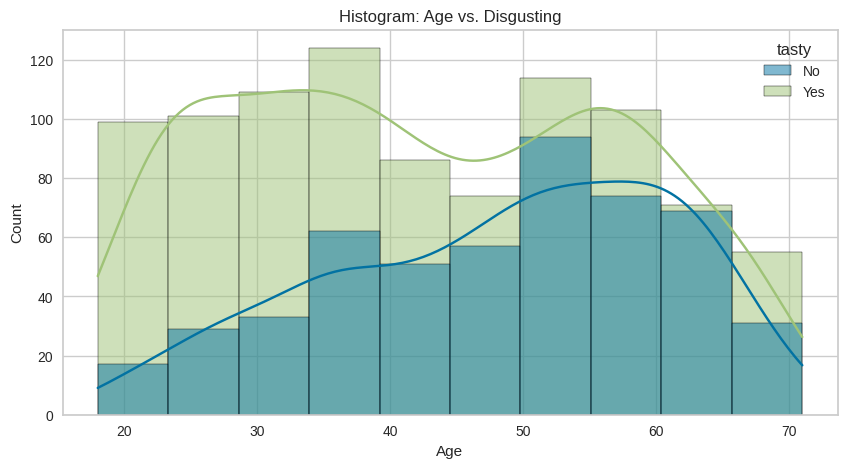

In [108]:
#MORE EXPLORATION BASED ON LIKES, VISITS AND AGE VS DISGUST, TASY
like_counts = data['Like'].value_counts()
print (like_counts)
plt.figure(figsize=(10, 6))
like_counts.plot(kind='bar', color='purple')
plt.xlabel('Like')
plt.ylabel('Count')
plt.title('Frequency of "Like" ')
plt.xticks(rotation=40, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()\


visit_counts = data['VisitFrequency'].value_counts()
print (visit_counts)
plt.figure(figsize=(10, 6))
visit_counts.plot(kind='bar', color='pink')
plt.xlabel('Like')
plt.ylabel('Count')
plt.title('Categorization of "Visits" ')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

df = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='disgusting', bins=10, kde=True)
plt.title('Histogram: Age vs. Disgusting')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='tasty', bins=10, kde=True)
plt.title('Histogram: Age vs. Disgusting')
plt.xlabel('Age')
plt.show()

In [109]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

df_binary = data.copy()
df_encoded= (df_binary.drop(['Like','Age','VisitFrequency','Gender'],axis=1))
df_encoded


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [110]:
#FOR PRINCIPAL COMPONENT ANALYSIS
label_encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
print (df_encoded)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_encoded)

pca = PCA(n_components=11)
pca.fit(standardized_data)

#Here, I have encoded the binary values as 1/0 and scaled it to fit better into the PCA analyser.

principal_components = pca.transform(standardized_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = principal_components, columns = names)
print (pf.head(),'\n')

#This gives us a sense of which attributes are relevant.
print (pca.explained_variance_ratio_)


      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  
2     

In [111]:
loadings_matrix = pca.components_.T

#The loadings indicate how the original variables are combined to form principal components.
loadings = pca.components_
loadings_df = pd.DataFrame(loadings_matrix, columns=names, index=df_encoded.columns)

print("Loadings Matrix:")
print(loadings_df)

explained_variance_ratios = pca.explained_variance_ratio_
print("\nExplained Variance Ratios:")
print(explained_variance_ratios)

Loadings Matrix:
                 pc1       pc2       pc3       pc4       pc5       pc6  \
yummy      -0.406955  0.282615 -0.259588  0.026237  0.346857 -0.124916   
convenient -0.308827 -0.045682 -0.317151 -0.009424 -0.437148  0.188966   
spicy      -0.023320  0.069982  0.020170  0.845496 -0.185551  0.438661   
fattening   0.177861 -0.205590 -0.608077 -0.023396  0.086934  0.107520   
greasy      0.267796 -0.136300 -0.389568  0.330854  0.343713 -0.278329   
fast       -0.213039 -0.282441 -0.211395  0.090363 -0.568939 -0.572734   
cheap      -0.289134 -0.575032  0.125157  0.114477  0.256981  0.020657   
tasty      -0.426115  0.242199 -0.269648  0.072691  0.286099 -0.053053   
expensive   0.290944  0.567528 -0.183298  0.035510 -0.207362 -0.171160   
healthy    -0.266839  0.201031  0.367814  0.301990  0.051787 -0.446166   
disgusting  0.410744 -0.143888  0.090299  0.235231  0.105843 -0.328041   

                 pc7       pc8       pc9      pc10      pc11  
yummy       0.159878  0.016587 

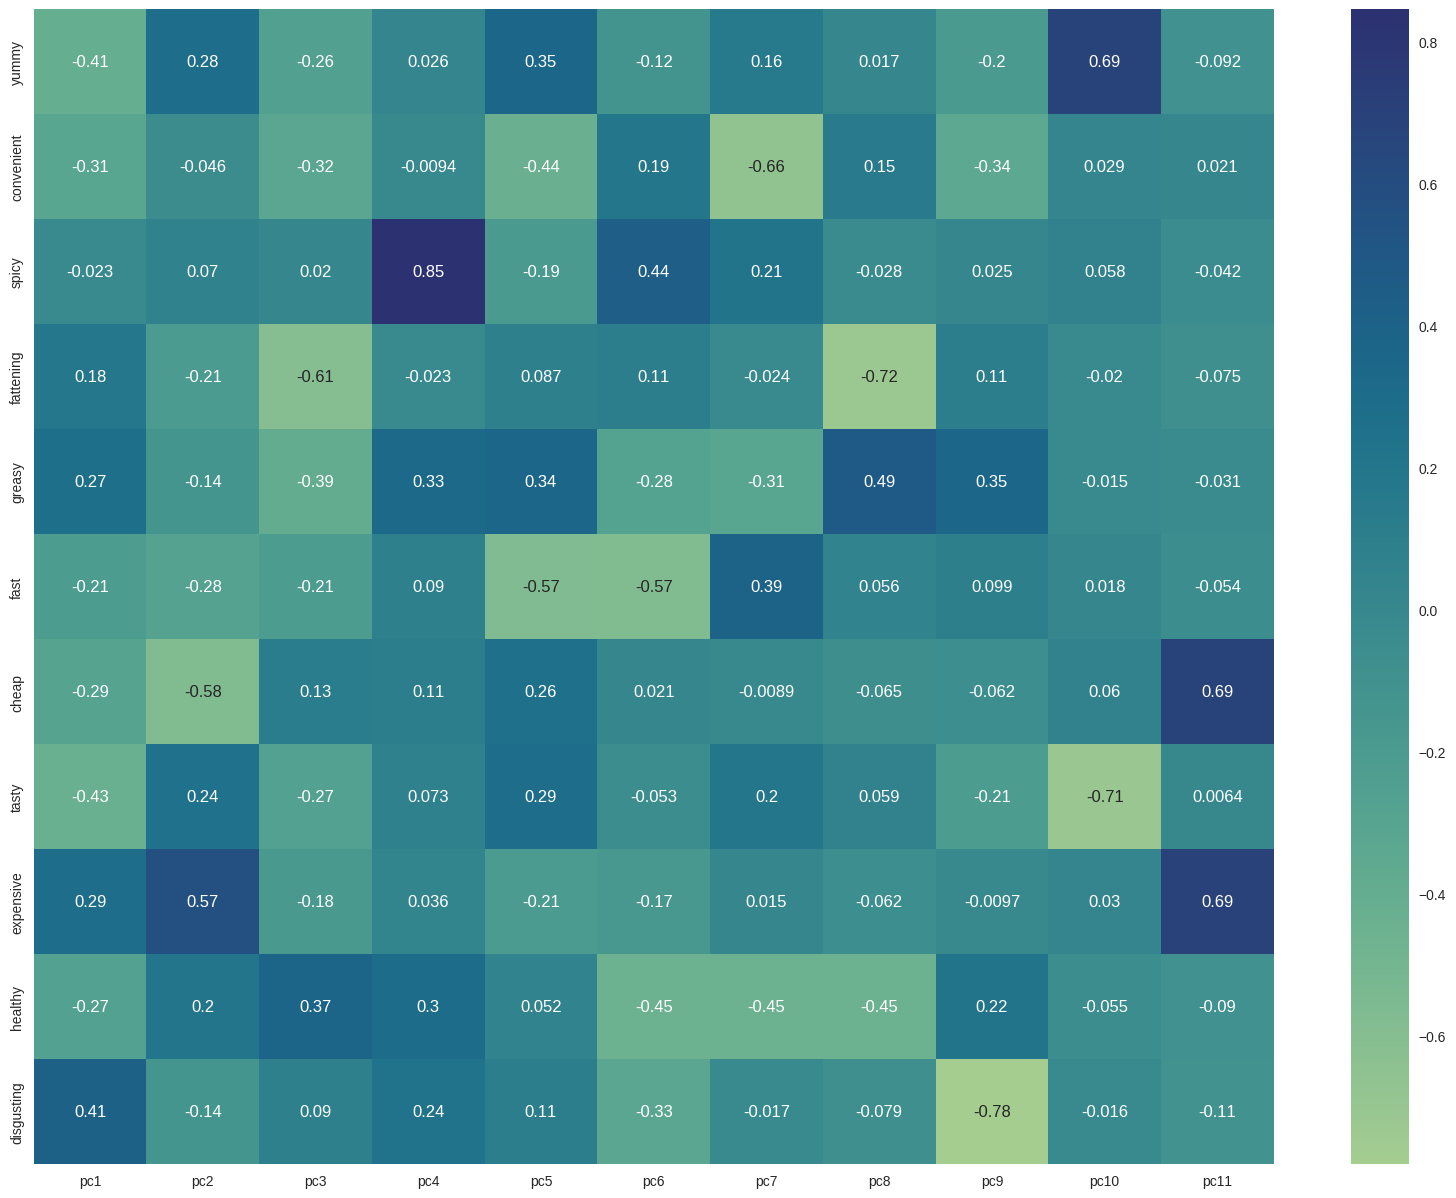

In [112]:

plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='crest')
plt.show()

[[ 0.7043341  -0.43701594  0.26869753 ...  0.36759835  0.32116088
   1.70117028]
 [-0.46782033  0.36427698 -1.59683477 ...  0.22185463  0.19126755
   1.46768084]
 [ 0.19198578  1.71294939 -0.3394127  ...  1.37722643 -1.25929967
  -0.12853003]
 ...
 [-0.41427514  1.8104382  -1.07194798 ... -0.3448475   0.09855804
   0.11820543]
 [-2.80362953  0.56275909  2.27888724 ... -0.21143409  0.08312666
   0.07761405]
 [ 3.49910468  1.06999906  0.14897107 ... -0.96426896  0.07057896
   0.15501636]]


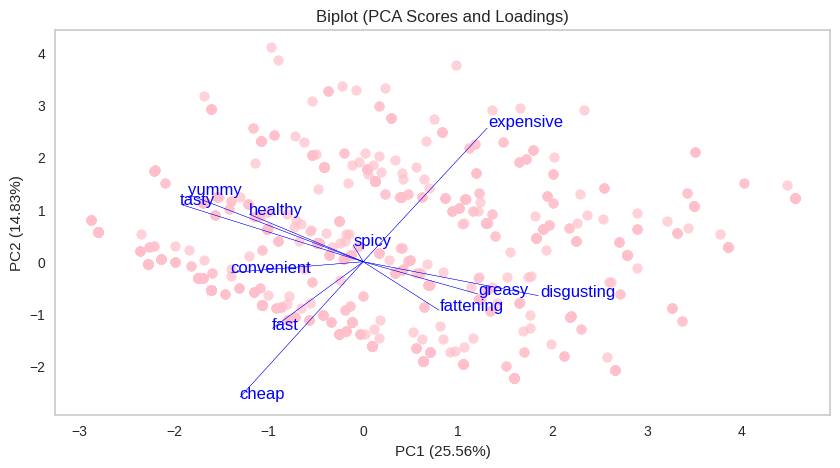

In [113]:
pca_scores = PCA().fit_transform(standardized_data)
print (pca_scores)

#IN THE REPORT, A BIPLOT HAS MENTIONED THE ROLE OF CHEAP, EXPENSIVE FEATURES.
plt.figure(figsize=(10, 5))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], alpha=0.7, color='pink')

for i, variable in enumerate(df_encoded.columns.values):
    plt.arrow(0, 0, loadings[0, i]*4.5, loadings[1, i]*4.5, color='blue', alpha=0.7)
    plt.text(loadings[0, i] * 4.55, loadings[1, i] * 4.55, variable, color='blue')
#Using arrows and scatterplot to create a biplot.
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('Biplot (PCA Scores and Loadings)')

plt.grid()
plt.show()

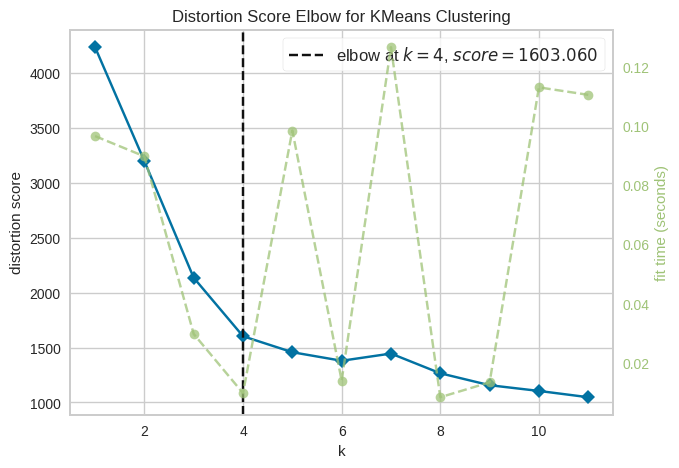

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:
#STEP 5---EXTRACTING SEGMENTS
model=KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show()

In [115]:
from collections import Counter
#USING K-MEANS WITH THE RESULTED ELBOW METHOD NUMBER OF CLUSTERS
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df_encoded['cluster_num'] = kmeans.labels_
data['cluster_num'] = kmeans.labels_
print('Cluster size: ', Counter(kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster size:  Counter({1: 580, 0: 323, 2: 304, 3: 246})


<ipython-input-116-6ca30e4629be>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids",cmap='warmcolor')


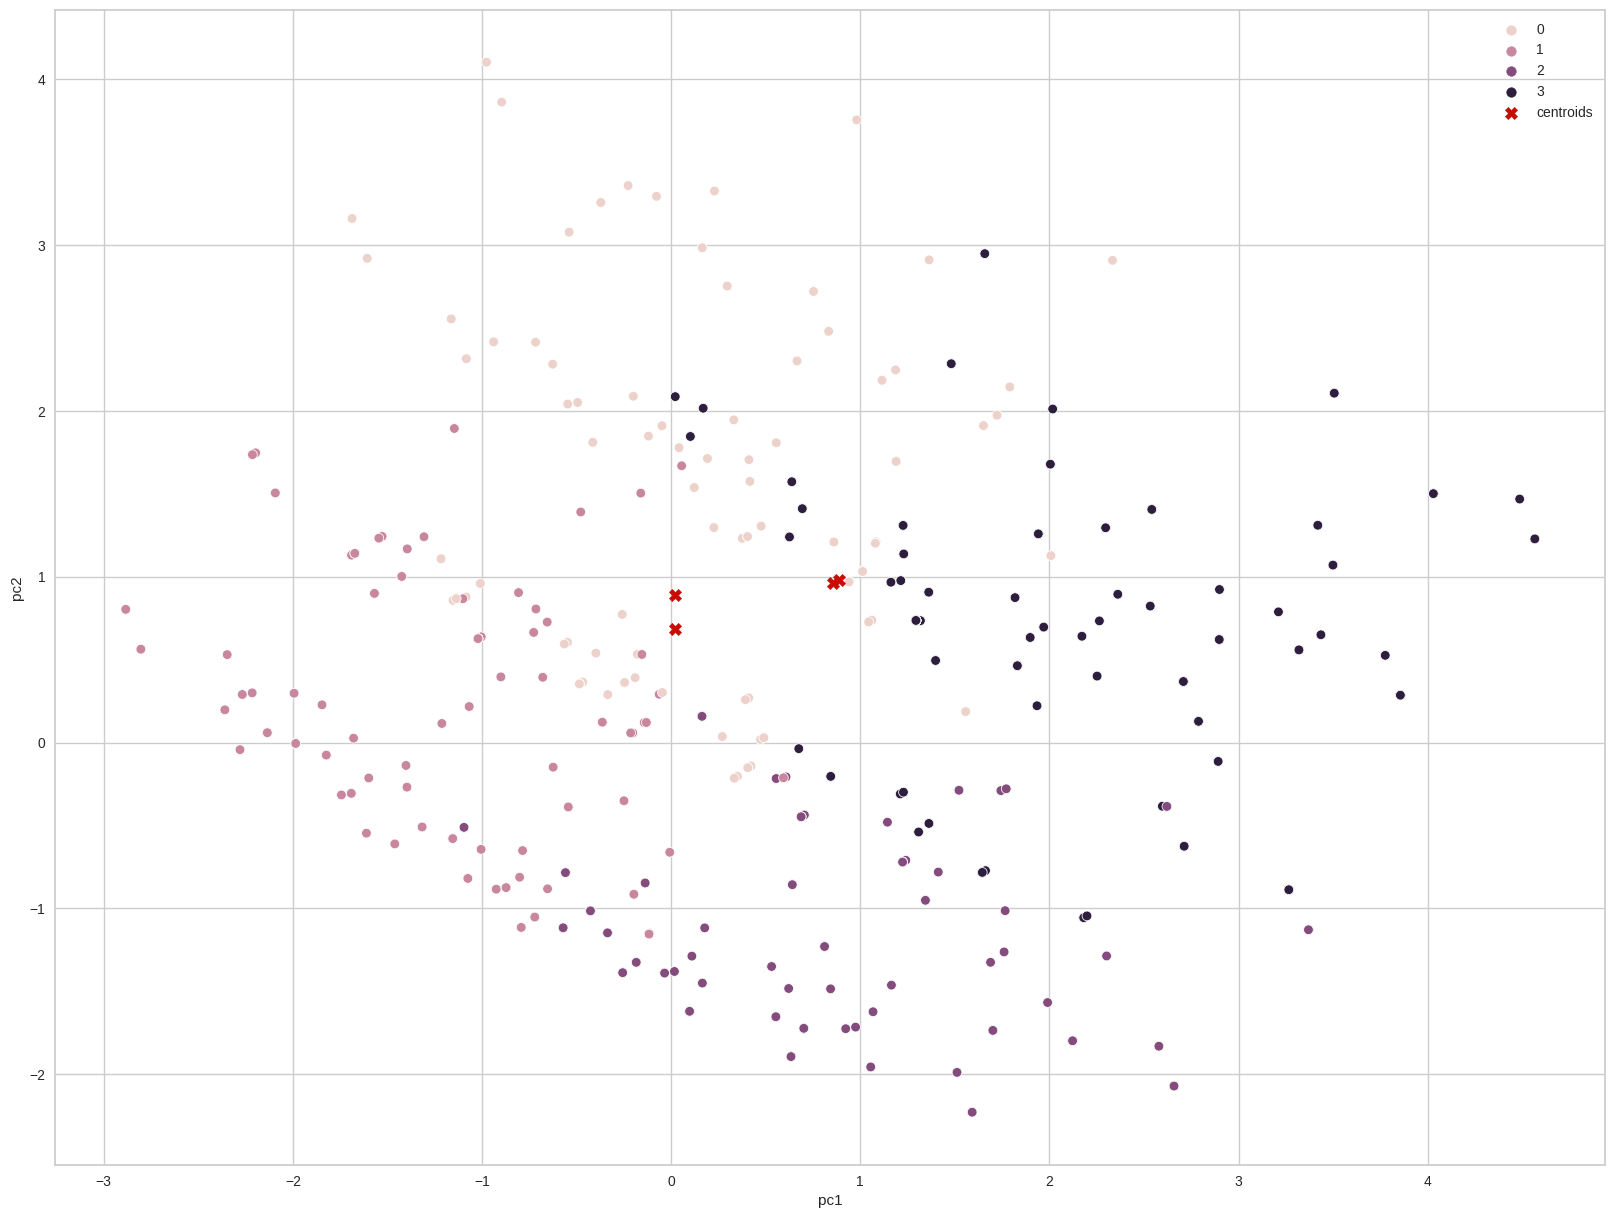

In [116]:
#VISUALISING CLUSTERS
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids",cmap='warmcolor')
plt.legend()
plt.show()

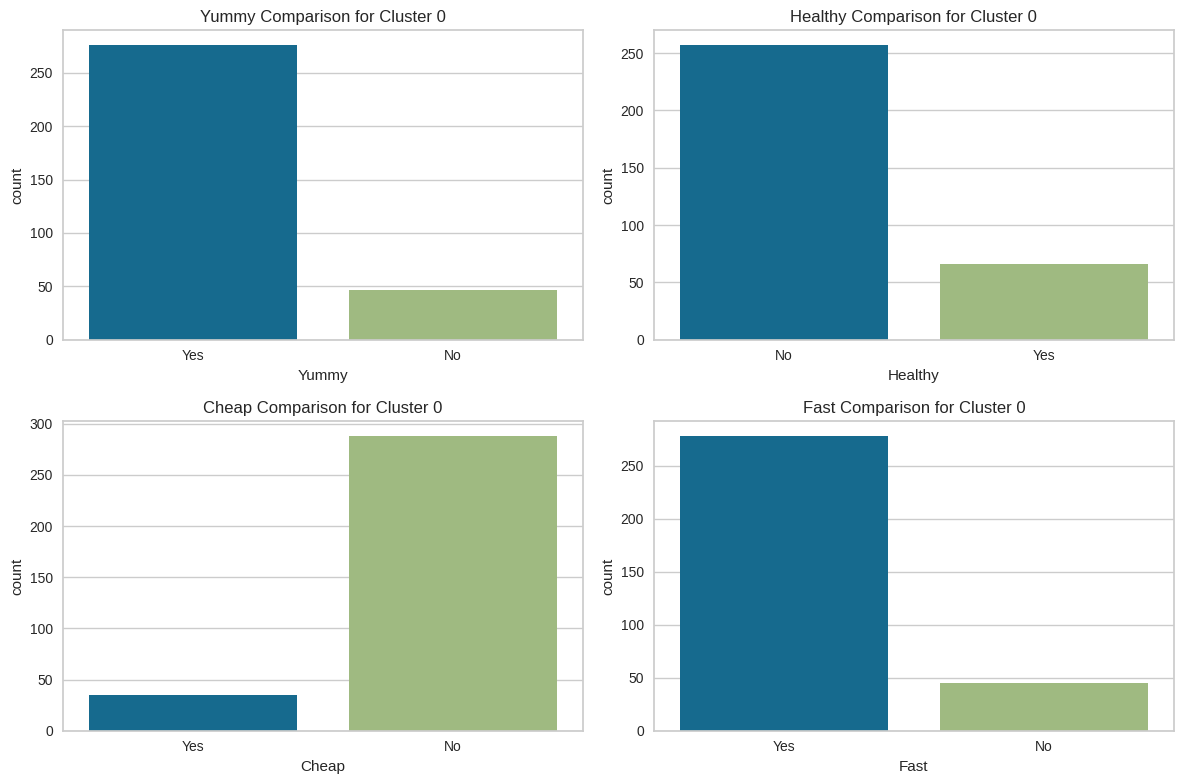

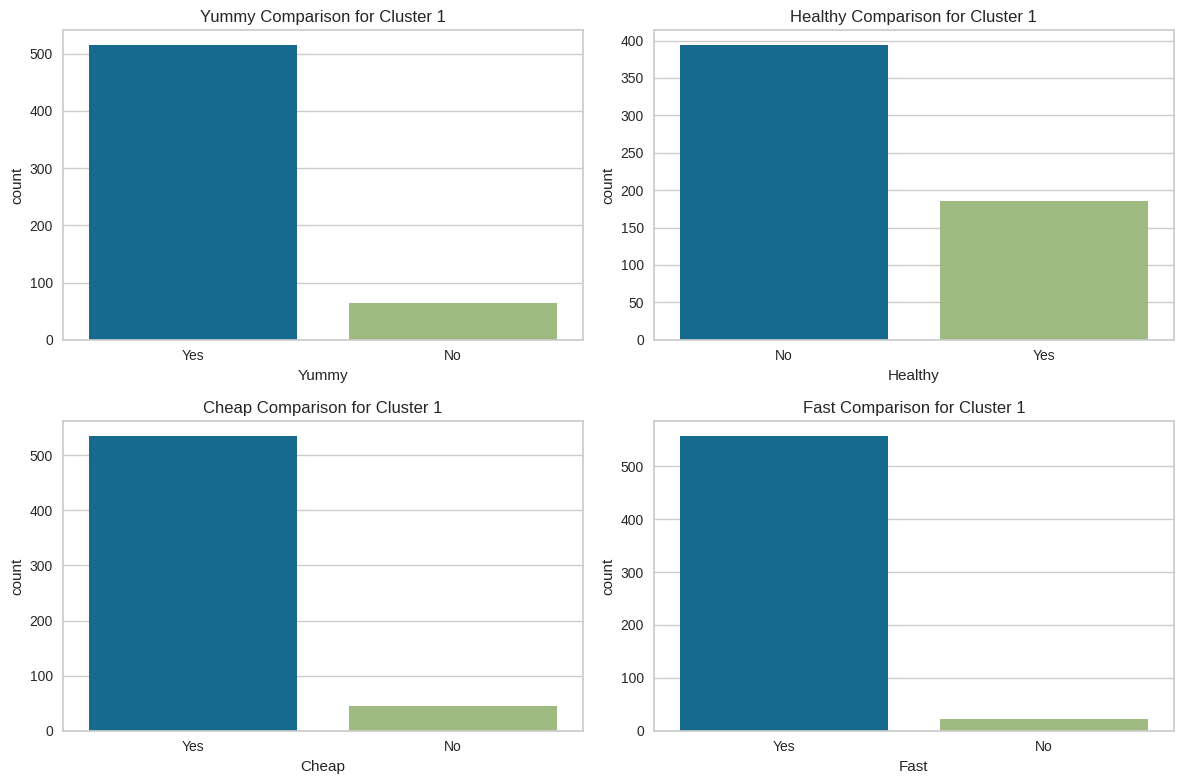

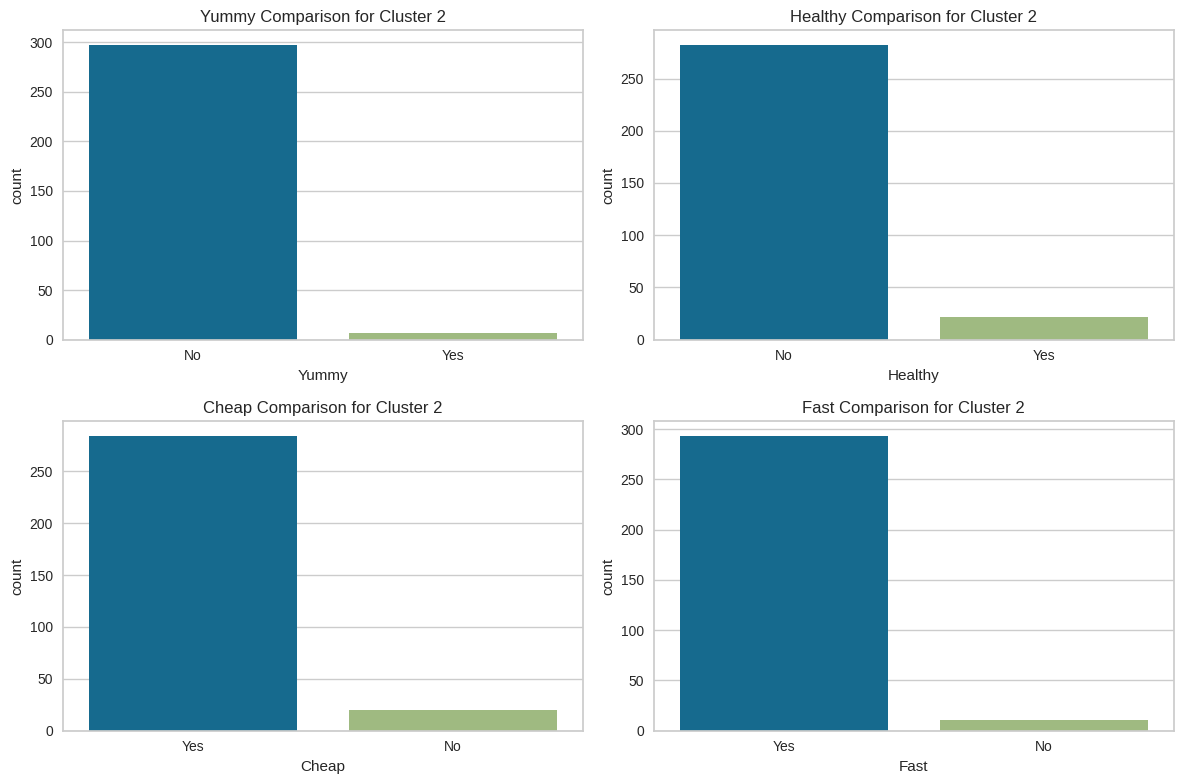

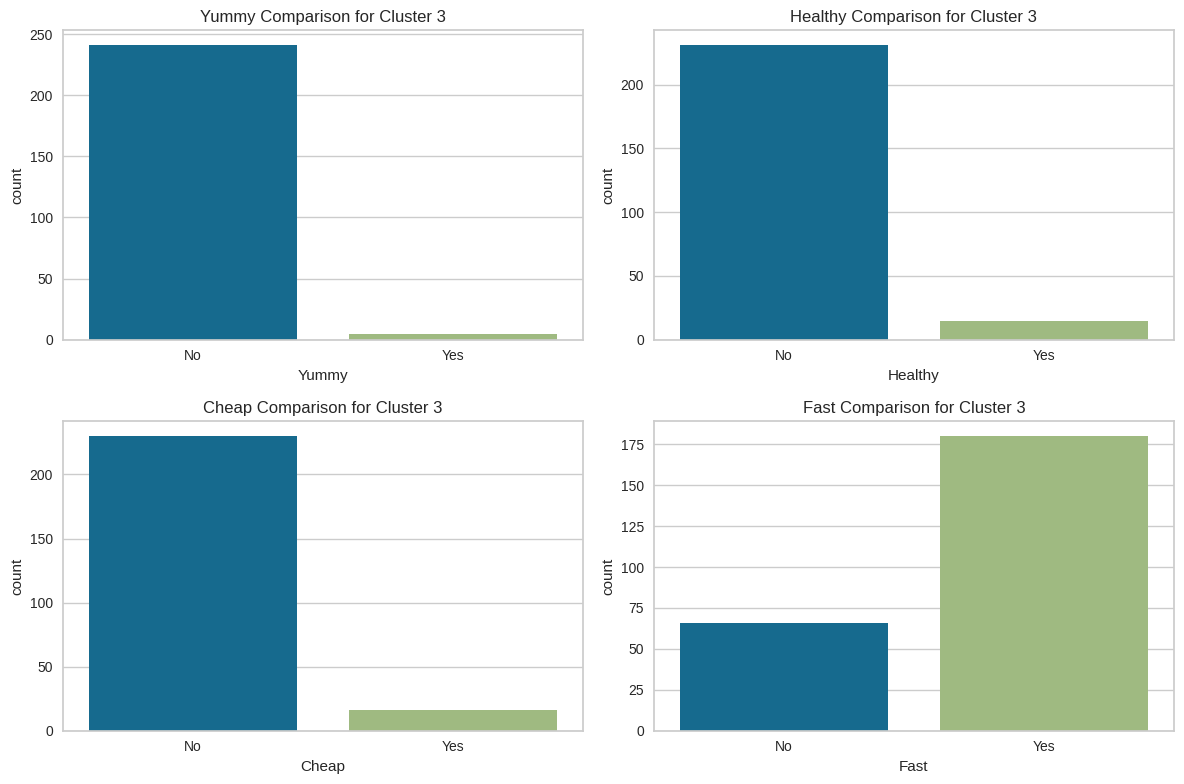

In [117]:
#STUDYING THE MARKET SEGMENTS
def compare_cluster(cluster_num):
    cluster_data = df[df_encoded['cluster_num'] == cluster_num]

    plt.figure(figsize=(12, 8))

    # Subplot 1: 'yummy' comparison
    plt.subplot(2, 2, 1)
    sns.countplot(x='yummy', data=cluster_data)
    plt.xlabel('Yummy')
    plt.title(f'Yummy Comparison for Cluster {cluster_num}')

    # Subplot 2: 'healthy' comparison
    plt.subplot(2, 2, 2)
    sns.countplot(x='healthy', data=cluster_data)
    plt.xlabel('Healthy')
    plt.title(f'Healthy Comparison for Cluster {cluster_num}')

    # Subplot 3: 'cheap' comparison
    plt.subplot(2, 2, 3)
    sns.countplot(x='cheap', data=cluster_data)
    plt.xlabel('Cheap')
    plt.title(f'Cheap Comparison for Cluster {cluster_num}')

    # Subplot 4: 'fast' comparison
    plt.subplot(2, 2, 4)
    sns.countplot(x='fast',  data=cluster_data)
    plt.xlabel('Fast')
    plt.title(f'Fast Comparison for Cluster {cluster_num}')

    plt.tight_layout()
    plt.show()
for cluster in range(4):
    compare_cluster(cluster)

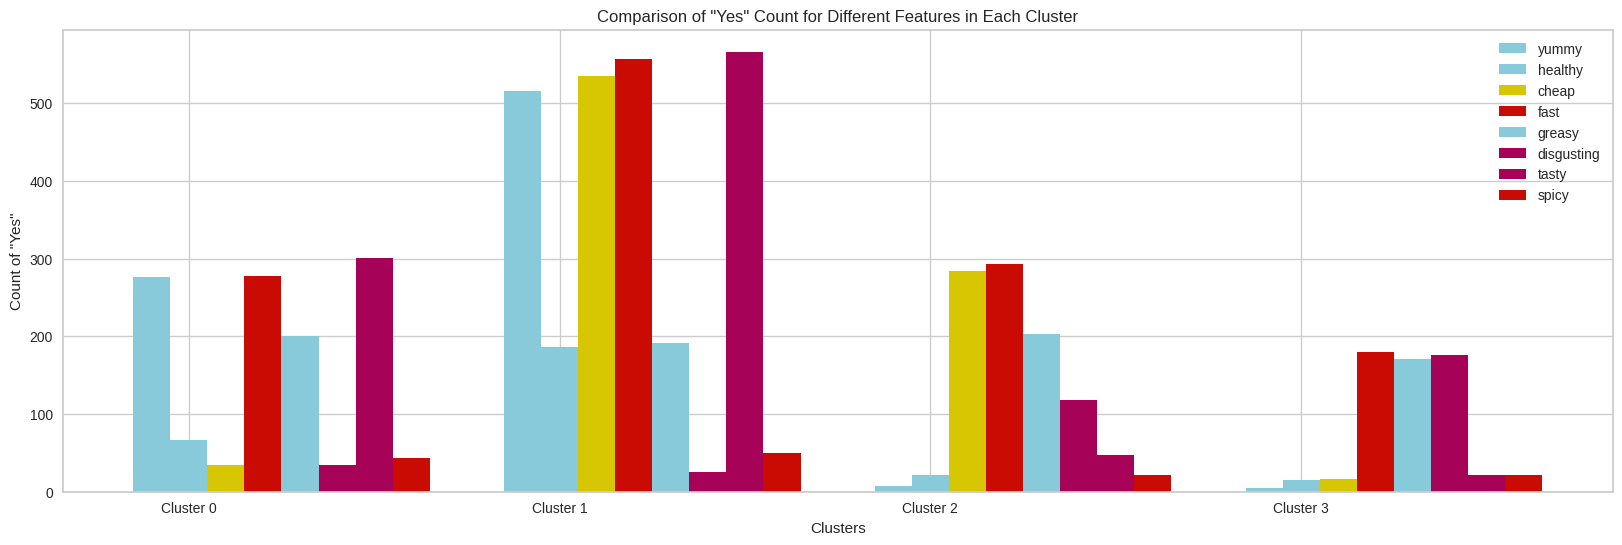

<Axes: xlabel='cluster_num', ylabel='Age'>

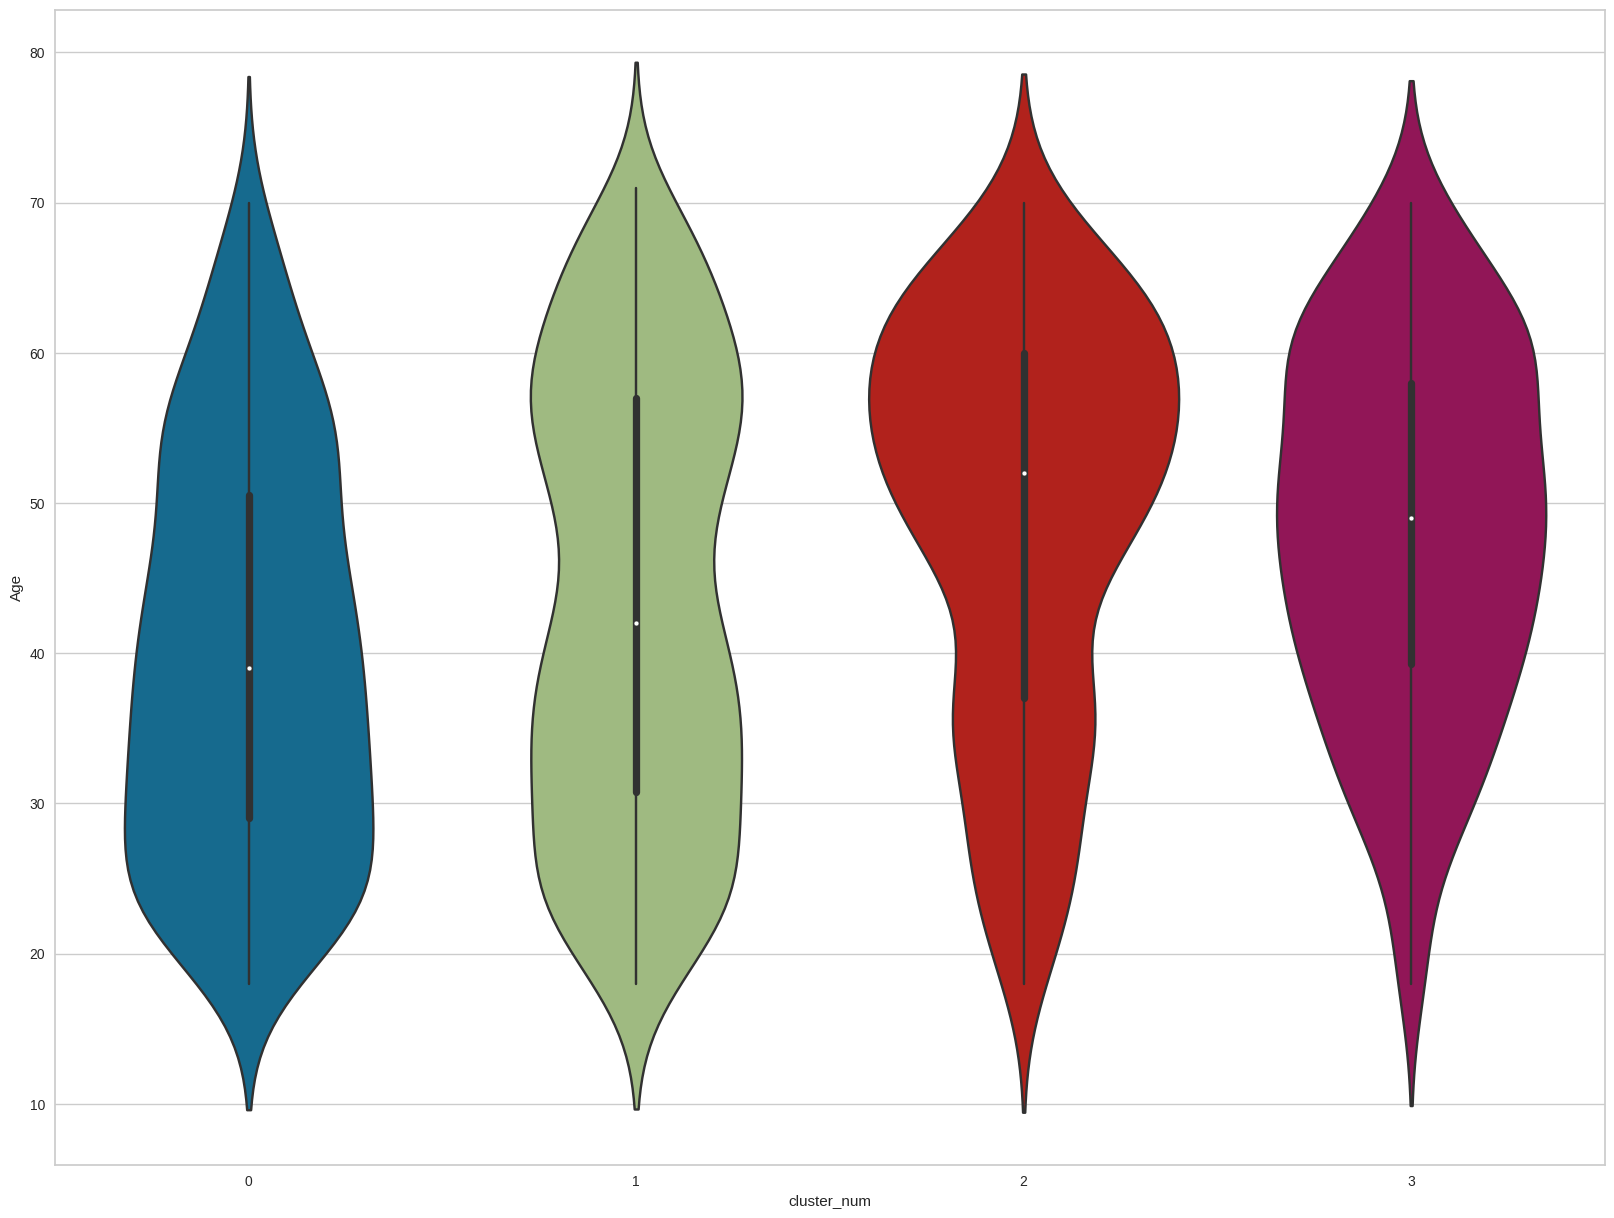

In [118]:
#STEP 6---PROFILING SEGMENTS
features = ['yummy', 'healthy', 'cheap', 'fast','greasy','disgusting','tasty','spicy']

import random
palette_names = sns.color_palette().as_hex()

counts = {}
for feature in features:
    counts[feature] = [df[df_encoded['cluster_num'] == i][feature].eq('Yes').sum() for i in range(4)]

#COMPARING EACH FEATURE
plt.figure(figsize=(20, 6))
bar_width = 0.1
cluster_labels = [f'Cluster {i}' for i in range(4)]
colors=['pink','blue','purple','turquoise']
for i, feature in enumerate(features):
    x = [j + i * bar_width for j in range(4)]
    plt.bar(x, counts[feature], width=bar_width, label=feature,color=random.choice(palette_names))

plt.xlabel('Clusters')
plt.ylabel('Count of "Yes"')
plt.xticks([j + bar_width for j in range(4)], cluster_labels)
plt.title('Comparison of "Yes" Count for Different Features in Each Cluster')
plt.legend()
plt.show()

#AGE DISTRIBUTION IN EACH SEGMENT
sns.violinplot(x='cluster_num', y='Age', data=data)
#Box plot hybrid.


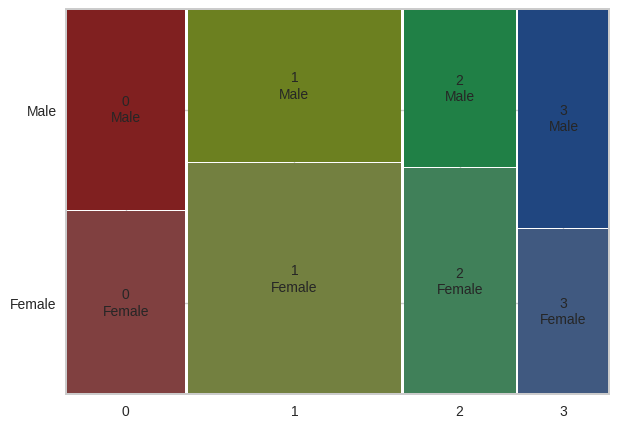

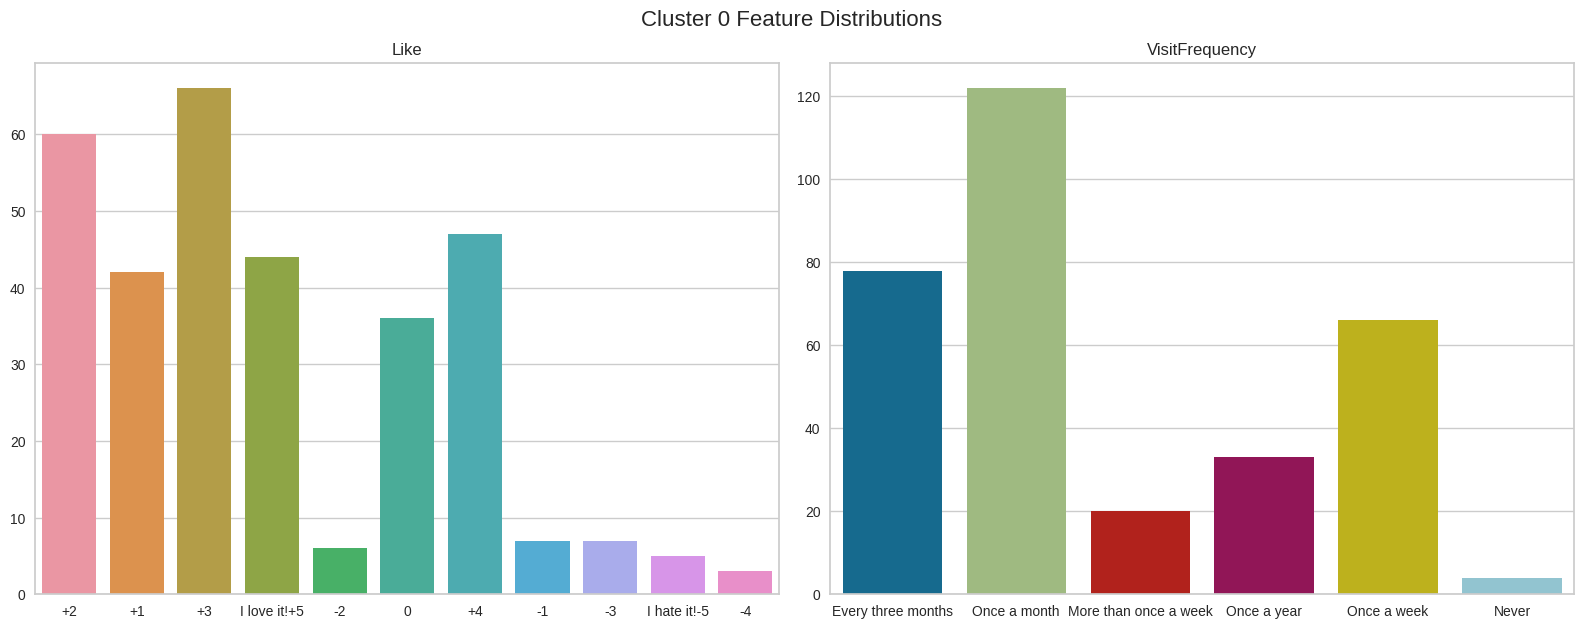

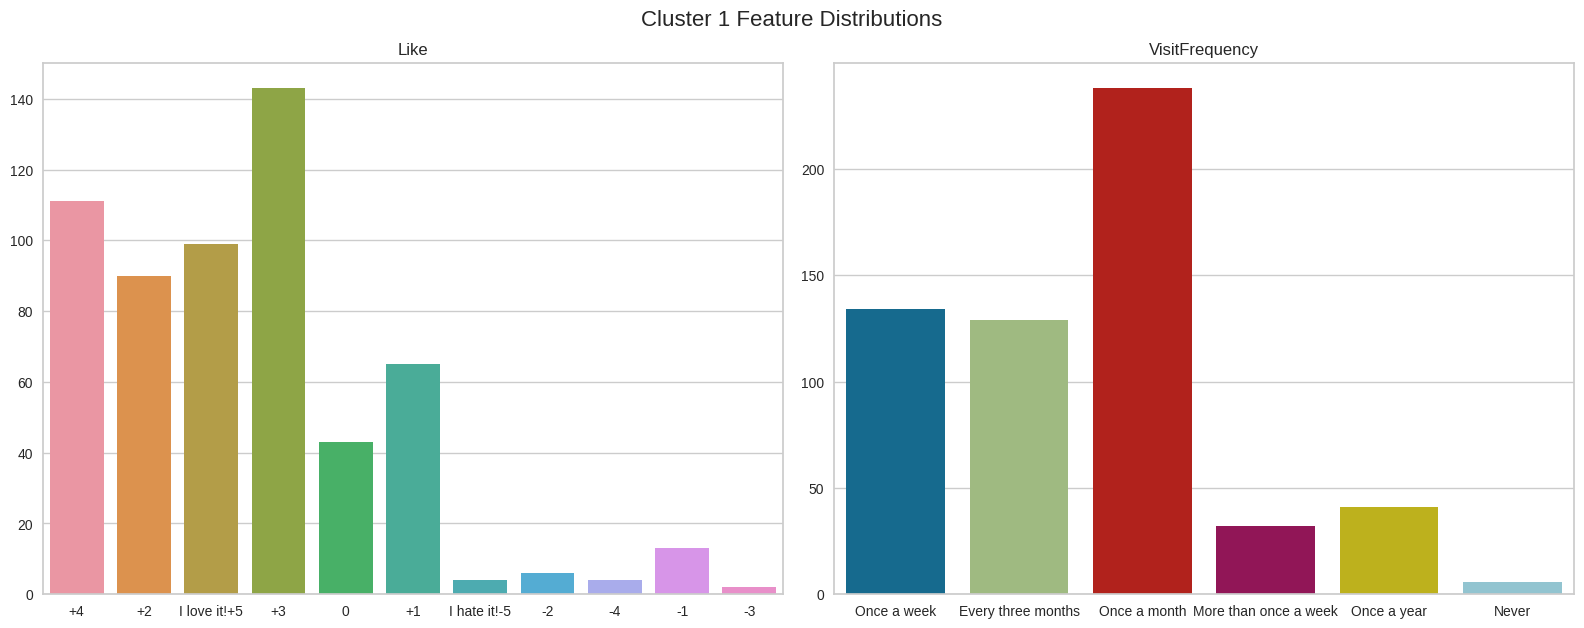

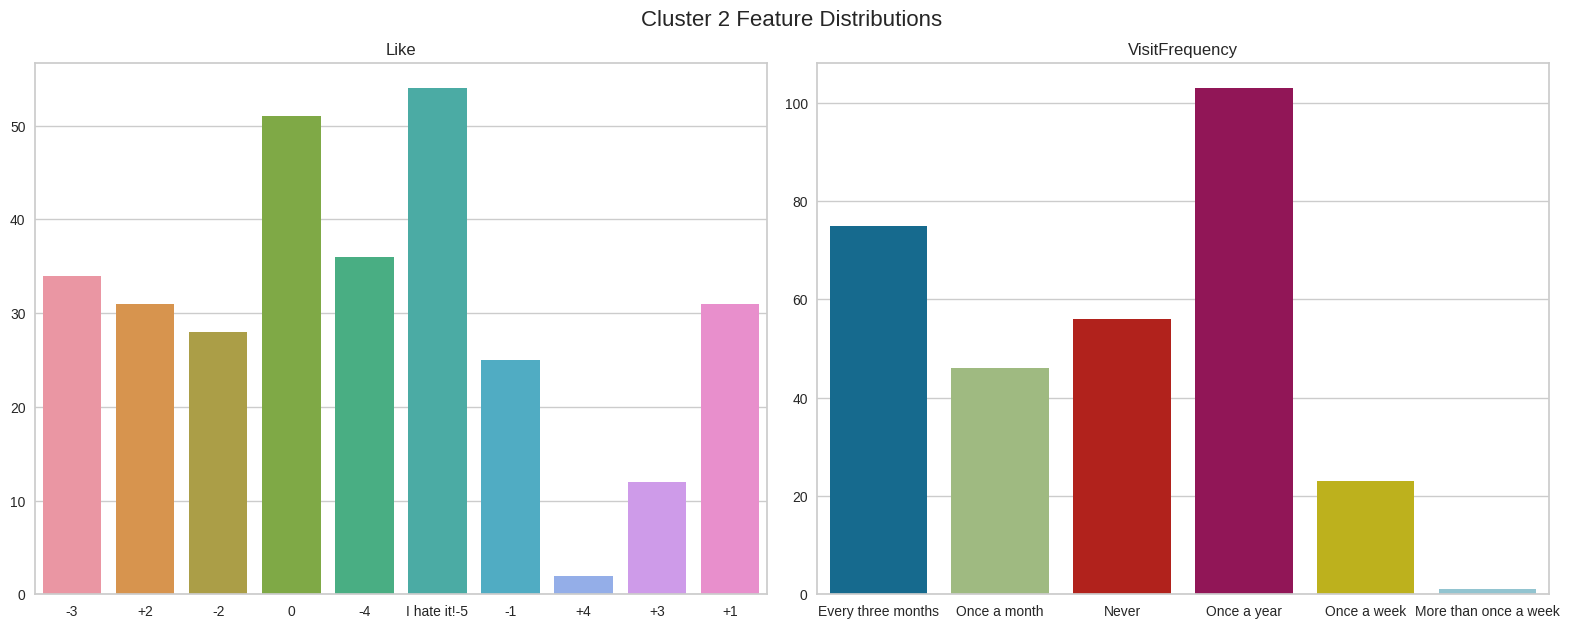

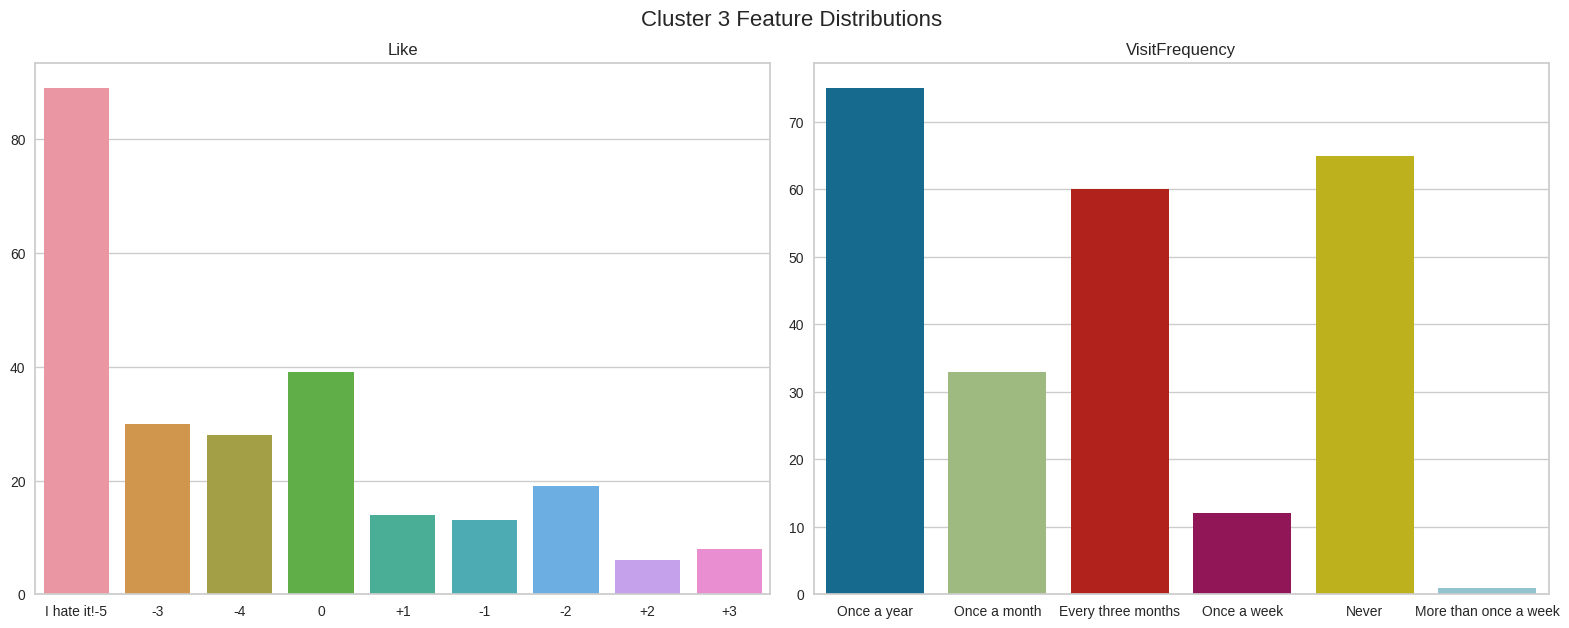

In [119]:
#STEP 7---DESCRIBE THE SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
clusters=[0,1,2,3]
#MOSAIC PLOT FOR GENDER RATIO IN EACH CLUSTER
#Creating a contingency table of Cluster-Nums and Gender
crosstab_gender = pd.crosstab(data['cluster_num'], data['Gender'])

# Plot mosaic plot
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab_gender.stack())
plt.show()

features = ['Like', 'VisitFrequency']

# Create separate bar plots for each feature within each cluster
for cluster in np.sort(clusters):
    plt.figure(figsize=(16, 12))
    plt.suptitle(f'Cluster {cluster} Feature Distributions', fontsize=16)
    for i, feature in enumerate(features):
        plt.subplot(2, 2, i + 1)  # Adjust the number of rows and columns as needed
        sns.countplot(data=df[df_encoded['cluster_num'] == cluster], x=feature)
        plt.title(feature)
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.show()



In [122]:
#STEP 8---SELECTING TARGET SEGMENTS

#We can calculate the mean for each, Age, Like, Gender and VisitFrequency to converge them into one xomparative plot.
data['VisitFrequency'],data['Like'],data['Gender'] = LabelEncoder().fit_transform(df['VisitFrequency']),LabelEncoder().fit_transform(df['Like']),LabelEncoder().fit_transform(df['Gender'])
visits=data.groupby('cluster_num')['VisitFrequency'].mean()
likes=data.groupby('cluster_num')['Like'].mean()
gens=data.groupby('cluster_num')['Gender'].mean()
print (visits)
print (likes)
print (gens)

cluster_num
0    2.547988
1    2.584483
2    2.822368
3    2.654472
Name: VisitFrequency, dtype: float64
cluster_num
0    3.798762
1    3.794828
2    5.430921
3    6.739837
Name: Like, dtype: float64
cluster_num
0    0.523220
1    0.398276
2    0.411184
3    0.569106
Name: Gender, dtype: float64


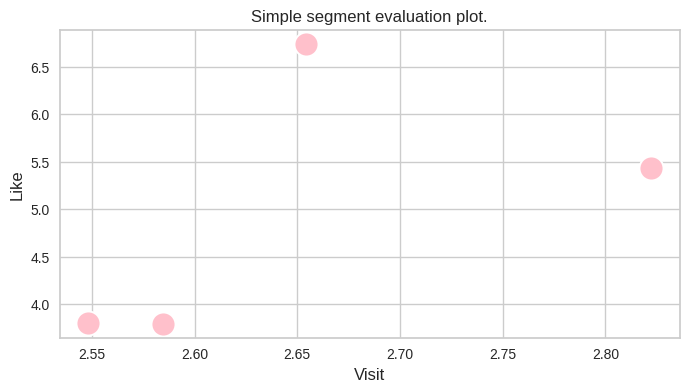

In [127]:
visits_df = pd.DataFrame({'cluster_num': visits.index, 'VisitFrequency': visits.values})
likes_df = pd.DataFrame({'cluster_num': likes.index, 'Like': likes.values})
gens_df = pd.DataFrame({'cluster_num': gens.index, 'Gender': gens.values})

#PLOTTING ON ONE GRAPH
combined_df = visits_df.merge(likes_df, on='cluster_num').merge(gens_df, on='cluster_num')
plt.figure(figsize = (8,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=combined_df,s=300, color="pink")
plt.title("Simple segment evaluation plot.", fontsize = 12)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()